# Injection comparision with e0=0.1
## TaylorF2EccPerAdvFD(Leading order e0 and e) Vs TaylorF2EccPerAdvFD1PNAmp Vs TaylorF2Ecc(3.5PN phase) Vs TaylorF2(3.0PN phase)

In [1]:
import numpy as np
import bilby
import matplotlib.pyplot as plt
%matplotlib inline

C = 299792458.
G = 6.67408*1e-11
Mo = 1.989*1e30
Mpc = 3.086*1e22

In [2]:
time_of_event = 1126259642.413
post_trigger_duration = 1.0
duration = 16.0
analysis_start = time_of_event + post_trigger_duration - duration
sampling_frequency = 512.

# Frequency point check.
## difference between TaylorF2EccPerAdvFD and TaylorF2EccPerAdvFD1PNAmp is quite small. e0=0.1

In [4]:
%timeit bilby.gw.source.lal_TaylorF2EccPerAdvFD(np.array([20,30,40]), 6.5, 5.8, 0.1, 200, 0.4, 1.3)

237 µs ± 10.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [6]:
%timeit bilby.gw.source.lal_TaylorF2EccPerAdvFDLeO(np.array([20,30,40]), 6.5, 5.8, 0.1, 200, 0.4, 1.3)

109 µs ± 1.68 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [7]:
bilby.gw.source.lal_TaylorF2EccPerAdvFD(np.array([20,30,40]), 6.5, 5.8, 0.1, 200, 0.4, 1.3)

{'plus': array([ 0.00000000e+00+0.00000000e+00j,  8.41792912e-23+5.52987159e-23j,
        -7.29901729e-24-3.76865321e-23j]),
 'cross': array([ 0.00000000e+00+0.00000000e+00j, -5.48968142e-23+8.40345632e-23j,
         3.75781244e-23-7.22348197e-24j])}

In [8]:
bilby.gw.source.lal_TaylorF2EccPerAdvFDLeO(np.array([20,30,40]), 6.5, 5.8, 0.1, 200, 0.4, 1.3)

{'plus': array([ 0.00000000e+00+0.00000000e+00j,  9.26647478e-23+5.54163956e-23j,
        -5.06623559e-24-3.85170646e-23j]),
 'cross': array([ 0.00000000e+00+0.00000000e+00j, -4.75965431e-23+9.76590802e-23j,
         3.67128615e-23-4.08304672e-24j])}

In [9]:
%timeit bilby.gw.source.lal_TaylorF2EccPerAdvFD1PNAmp(np.array([20,30,40]), 6.5, 5.8, 0.1, 200, 0.4, 1.3)

481 µs ± 31.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [10]:
%timeit bilby.gw.source.lal_TaylorF2EccPerAdvFD1PNAmpLeO(np.array([20,30,40]), 6.5, 5.8, 0.1, 200, 0.4, 1.3)

196 µs ± 2.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [20]:
bilby.gw.source.lal_TaylorF2EccPerAdvFD(np.array([20,30,40]), 6.5, 5.8, 0.1, 200, 0.4, 1.3)

{'plus': array([ 0.00000000e+00+0.00000000e+00j,  8.46126775e-23+5.70655365e-23j,
        -5.13043068e-24-3.76504709e-23j]),
 'cross': array([ 0.00000000e+00+0.00000000e+00j, -4.92448724e-23+8.96731715e-23j,
         3.58530649e-23-4.14616370e-24j])}

In [4]:
bilby.gw.source.lal_TaylorF2EccPerAdvFD1PNAmp(np.array([20,30,40]), 6.5, 5.8, 0.1, 200, 0.4, 1.3)

{'plus': array([ 0.00000000e+00+0.00000000e+00j,  8.18115974e-23+5.72034362e-23j,
        -6.79594863e-24-3.69929174e-23j]),
 'cross': array([ 0.00000000e+00+0.00000000e+00j, -5.68075858e-23+8.16713279e-23j,
         3.68838549e-23-6.72962490e-24j])}

## here is quick frequency point check between TaylorF2 and TaylorF2Ecc(e0=0.1).

In [11]:
%timeit bilby.gw.source.lal_taylorF2Ecc_fd(np.array([20,30,40]), 6.5, 5.8, 0.1, 200, 0.0, 0.0, 0.4, 1.3) #e0=0.1

101 µs ± 3.75 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [12]:
%timeit bilby.gw.source.lal_taylorF2_fd(np.array([20,30,40]), 6.5, 5.8, 200, 0.0, 0.0, 0.4, 1.3)

91.6 µs ± 4.63 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [4]:
############# TaylorF2EccPerAdvFD waveform model ################
injection_parameters = dict(
    mass_1=6.5, mass_2=5.8, eccentricity=0.1, luminosity_distance=200.,
    theta_jn=0.4, psi=2.659, phase=1.3, geocent_time=1126259642.413, ra=1.375, dec=-1.2108)

waveform_arguments = dict(waveform_approximant='TaylorF2EccPerAdvFD',
                          reference_frequency=0., minimum_frequency=10.)

waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_TaylorF2EccPerAdvFD,
    parameters=injection_parameters, waveform_arguments=waveform_arguments)

ifos = bilby.gw.detector.InterferometerList(['H1', 'L1'])
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)
ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)

07:26 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_TaylorF2EccPerAdvFD
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
07:26 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
07:26 bilby INFO    : Injected signal in H1:
07:26 bilby INFO    :   optimal SNR = 31.89
07:26 bilby INFO    :   matched filter SNR = 30.61-1.22j
07:26 bilby INFO    :   mass_1 = 6.5
07:26 bilby INFO    :   mass_2 = 5.8
07:26 bilby INFO    :   eccentricity = 0.1
07:26 bilby INFO    :   luminosity_distance = 200.0
07:26 bilby INFO    :   theta_jn = 0.4
07:26 bilby INFO    :   psi = 2.659
07:26 bilby INFO    :   phase = 1.3
07:26 bilby INFO    :   geocent_time = 1126259642.413
07:26 bilby INFO    :   ra = 1.375
07:26 bilby INFO    :   dec = -1.2108
07:26 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
07:26 bilby INFO    : Injected si

[{'plus': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -1.96548900e-24+1.08307930e-24j, -1.96881360e-24+1.07566331e-24j,
         -1.97210787e-24+1.06824335e-24j]),
  'cross': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -1.08195835e-24-1.96206631e-24j, -1.07455911e-24-1.96538286e-24j,
         -1.06715592e-24-1.96866917e-24j])},
 {'plus': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -1.96548900e-24+1.08307930e-24j, -1.96881360e-24+1.07566331e-24j,
         -1.97210787e-24+1.06824335e-24j]),
  'cross': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -1.08195835e-24-1.96206631e-24j, -1.07455911e-24-1.96538286e-24j,
         -1.06715592e-24-1.96866917e-24j])}]

In [5]:
snrs = [ifo.meta_data["optimal_SNR"] for ifo in ifos]
np.sqrt(np.sum([i ** 2 for i in snrs]))

41.02867483296742

In [6]:
############# TaylorF2EccPerAdvFD1PNAmp waveform model ################
injection_parameters2 = dict(
     mass_1=6.5, mass_2=5.8, eccentricity=0.1, luminosity_distance=200.,
    theta_jn=0.4, psi=2.659, phase=1.3, geocent_time=1126259642.413, ra=1.375, dec=-1.2108)

waveform_arguments2 = dict(waveform_approximant='TaylorF2EccPerAdvFD1PNAmp',
                          reference_frequency=0., minimum_frequency=10.)

waveform_generator2 = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_TaylorF2EccPerAdvFD1PNAmp,
    parameters=injection_parameters2, waveform_arguments=waveform_arguments2)

ifos2 = bilby.gw.detector.InterferometerList(['H1', 'L1'])
ifos2.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)
ifos2.inject_signal(waveform_generator=waveform_generator2,
                   parameters=injection_parameters2)

07:26 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_TaylorF2EccPerAdvFD1PNAmp
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
07:26 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
07:26 bilby INFO    : Injected signal in H1:
07:26 bilby INFO    :   optimal SNR = 30.50
07:26 bilby INFO    :   matched filter SNR = 31.42+0.91j
07:26 bilby INFO    :   mass_1 = 6.5
07:26 bilby INFO    :   mass_2 = 5.8
07:26 bilby INFO    :   eccentricity = 0.1
07:26 bilby INFO    :   luminosity_distance = 200.0
07:26 bilby INFO    :   theta_jn = 0.4
07:26 bilby INFO    :   psi = 2.659
07:26 bilby INFO    :   phase = 1.3
07:26 bilby INFO    :   geocent_time = 1126259642.413
07:26 bilby INFO    :   ra = 1.375
07:26 bilby INFO    :   dec = -1.2108
07:26 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
07:26 bilby INFO    : Injec

[{'plus': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -1.75438731e-24+9.59322494e-25j, -1.75687414e-24+9.52787353e-25j,
         -1.75933355e-24+9.46263495e-25j]),
  'cross': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -9.56240753e-25-1.74874450e-24j, -9.49726646e-25-1.75122345e-24j,
         -9.43223782e-25-1.75367506e-24j])},
 {'plus': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -1.75438731e-24+9.59322494e-25j, -1.75687414e-24+9.52787353e-25j,
         -1.75933355e-24+9.46263495e-25j]),
  'cross': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -9.56240753e-25-1.74874450e-24j, -9.49726646e-25-1.75122345e-24j,
         -9.43223782e-25-1.75367506e-24j])}]

In [7]:
snrs = [ifo2.meta_data["optimal_SNR"] for ifo2 in ifos2]
np.sqrt(np.sum([i ** 2 for i in snrs]))

39.24641341135851

In [8]:
############# TaylorF2Eccn waveform model ################
injection_parameters3 = dict(
    mass_1=6.5, mass_2=5.8, eccentricity=0.1, luminosity_distance=200., a_1=0.0, a_2=0.0, theta_jn=0.4, psi=2.659,
    phase=1.3, geocent_time=1126259642.413, ra=1.375, dec=-1.2108)

waveform_arguments3 = dict(waveform_approximant='TaylorF2Ecc',
                          reference_frequency=10., minimum_frequency=10.)

waveform_generator3 = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_taylorF2Ecc_fd,
    parameters=injection_parameters3, waveform_arguments=waveform_arguments3)

ifos3 = bilby.gw.detector.InterferometerList(['H1', 'L1'])
ifos3.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)
ifos3.inject_signal(waveform_generator=waveform_generator3,
                   parameters=injection_parameters3)

07:26 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_taylorF2Ecc_fd
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
07:26 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
07:26 bilby INFO    : Injected signal in H1:
07:26 bilby INFO    :   optimal SNR = 31.91
07:26 bilby INFO    :   matched filter SNR = 32.23-1.39j
07:26 bilby INFO    :   mass_1 = 6.5
07:26 bilby INFO    :   mass_2 = 5.8
07:26 bilby INFO    :   eccentricity = 0.1
07:26 bilby INFO    :   luminosity_distance = 200.0
07:26 bilby INFO    :   a_1 = 0.0
07:26 bilby INFO    :   a_2 = 0.0
07:26 bilby INFO    :   theta_jn = 0.4
07:26 bilby INFO    :   psi = 2.659
07:26 bilby INFO    :   phase = 1.3
07:26 bilby INFO    :   geocent_time = 1126259642.413
07:26 bilby INFO    :   ra = 1.375
07:26 bilby INFO    :   dec = -1.2108
07:26 bilby INFO    : Generation of spin parameters 

[{'plus': array([0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         1.54636396e-24-1.64976581e-24j, 1.54811817e-24-1.64723585e-24j,
         1.54986424e-24-1.64470852e-24j]),
  'cross': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -1.64420394e-24-1.54115069e-24j, -1.64168252e-24-1.54289898e-24j,
         -1.63916370e-24-1.54463917e-24j])},
 {'plus': array([0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         1.54636396e-24-1.64976581e-24j, 1.54811817e-24-1.64723585e-24j,
         1.54986424e-24-1.64470852e-24j]),
  'cross': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -1.64420394e-24-1.54115069e-24j, -1.64168252e-24-1.54289898e-24j,
         -1.63916370e-24-1.54463917e-24j])}]

In [9]:
snrs = [ifo3.meta_data["optimal_SNR"] for ifo3 in ifos3]
np.sqrt(np.sum([i ** 2 for i in snrs]))

41.05299146999306

In [10]:
############# TaylorF2 waveform model ################
injection_parameters4 = dict(
    mass_1=6.5, mass_2=5.8, a_1=0.0, a_2=0.0, luminosity_distance=200., theta_jn=0.4, psi=2.659,
    phase=1.3, geocent_time=1126259642.413, ra=1.375, dec=-1.2108)

waveform_arguments4 = dict(waveform_approximant='TaylorF2',
                          reference_frequency=0., minimum_frequency=10.)

waveform_generator4 = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_taylorF2_fd,
    parameters=injection_parameters4, waveform_arguments=waveform_arguments4)

ifos4 = bilby.gw.detector.InterferometerList(['H1', 'L1'])
ifos4.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)
ifos4.inject_signal(waveform_generator=waveform_generator4,
                   parameters=injection_parameters4)

07:26 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_taylorF2_fd
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
07:26 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
07:26 bilby INFO    : Injected signal in H1:
07:26 bilby INFO    :   optimal SNR = 31.91
07:26 bilby INFO    :   matched filter SNR = 31.12-0.40j
07:26 bilby INFO    :   mass_1 = 6.5
07:26 bilby INFO    :   mass_2 = 5.8
07:26 bilby INFO    :   a_1 = 0.0
07:26 bilby INFO    :   a_2 = 0.0
07:26 bilby INFO    :   luminosity_distance = 200.0
07:26 bilby INFO    :   theta_jn = 0.4
07:26 bilby INFO    :   psi = 2.659
07:26 bilby INFO    :   phase = 1.3
07:26 bilby INFO    :   geocent_time = 1126259642.413
07:26 bilby INFO    :   ra = 1.375
07:26 bilby INFO    :   dec = -1.2108
07:26 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
07:26 bilby INFO

[{'plus': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -1.97857647e-24+1.09462499e-24j, -1.98198338e-24+1.08710519e-24j,
         -1.98535901e-24+1.07958089e-24j]),
  'cross': array([0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         1.09093468e-24+1.97190608e-24j, 1.08344022e-24+1.97530151e-24j,
         1.07594130e-24+1.97866575e-24j])},
 {'plus': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -1.97857647e-24+1.09462499e-24j, -1.98198338e-24+1.08710519e-24j,
         -1.98535901e-24+1.07958089e-24j]),
  'cross': array([0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         1.09093468e-24+1.97190608e-24j, 1.08344022e-24+1.97530151e-24j,
         1.07594130e-24+1.97866575e-24j])}]

In [11]:
snrs = [ifo4.meta_data["optimal_SNR"] for ifo4 in ifos4]
np.sqrt(np.sum([i ** 2 for i in snrs]))

41.05299146999306

07:27 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
07:27 bilby INFO    : Injected signal in H1:
07:27 bilby INFO    :   optimal SNR = 31.89
07:27 bilby INFO    :   matched filter SNR = 94.39-1.22j
07:27 bilby INFO    :   mass_1 = 6.5
07:27 bilby INFO    :   mass_2 = 5.8
07:27 bilby INFO    :   eccentricity = 0.1
07:27 bilby INFO    :   luminosity_distance = 200.0
07:27 bilby INFO    :   theta_jn = 0.4
07:27 bilby INFO    :   psi = 2.659
07:27 bilby INFO    :   phase = 1.3
07:27 bilby INFO    :   geocent_time = 1126259642.413
07:27 bilby INFO    :   ra = 1.375
07:27 bilby INFO    :   dec = -1.2108
07:27 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
07:27 bilby INFO    : Injected signal in L1:
07:27 bilby INFO    :   optimal SNR = 25.82
07:27 bilby INFO    :   matched filter SNR = 75.92+0.23j
07:27 bilby INFO    :   mass_1 = 6.5
07:27 bilby INFO    :   mass_2 = 5.8
07:27 bilby INFO    :   eccentricity = 0.1
07:27 bilby INFO    

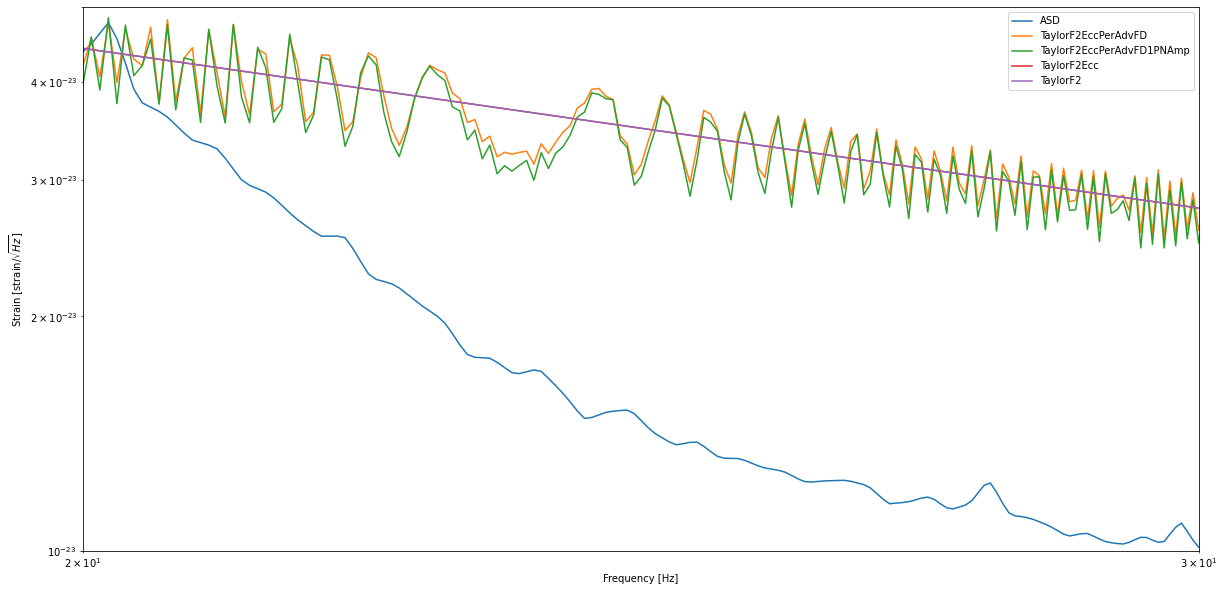

In [13]:
#to plot the frequency domain  
############# TaylorF2EccPerAdvFD waveform model ################
injection = ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)
H1 = ifos[0]
H1_injection = injection[0]
idxs = H1.strain_data.frequency_mask  

############# TaylorF2EccPerAdvFD1PNAmp ################
injection2 = ifos2.inject_signal(waveform_generator=waveform_generator2,
                   parameters=injection_parameters2)
H12 = ifos2[0]
H1_injection2 = injection2[0]
idxs2 = H12.strain_data.frequency_mask

############# TaylorF2Ecc waveform model ################
injection3 = ifos3.inject_signal(waveform_generator=waveform_generator3,
                   parameters=injection_parameters3)
H13 = ifos3[0]
H1_injection3 = injection3[0]
idxs3 = H13.strain_data.frequency_mask

############# TaylorF2Ecc waveform model ################
injection4 = ifos4.inject_signal(waveform_generator=waveform_generator4,
                   parameters=injection_parameters4)
H14 = ifos4[0]
H1_injection4 = injection4[0]
idxs4 = H14.strain_data.frequency_mask

############# TaylorF2EccPerAdvFD waveform model ################
fig, ax = plt.subplots()

'''ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]),
          label="data")'''
ax.loglog(H1.frequency_array[idxs],
          H1.amplitude_spectral_density_array[idxs],
          label="ASD")

ax.loglog(H1.frequency_array[idxs],
          np.abs(H1_injection["plus"][idxs]),
          label="TaylorF2EccPerAdvFD")

############# TaylorF2EccPerAdvFD1PNAmp waveform model ################
ax.loglog(H12.frequency_array[idxs2],
          np.abs(H1_injection2["plus"][idxs2]),
          label="TaylorF2EccPerAdvFD1PNAmp")

############# TaylorF2Ecc waveform model ################
ax.loglog(H13.frequency_array[idxs3],
          np.abs(H1_injection3["plus"][idxs3]),
          label="TaylorF2Ecc")

############# TaylorF2 waveform model ################
ax.loglog(H14.frequency_array[idxs4],
          np.abs(H1_injection4["plus"][idxs4]),
          label="TaylorF2")

#############################
ax.set_xlim(20.,30.)
ax.set_ylim(1e-23,0.5e-22)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
plt.rcParams['figure.figsize'] = [20, 10]
ax.legend()
plt.show()

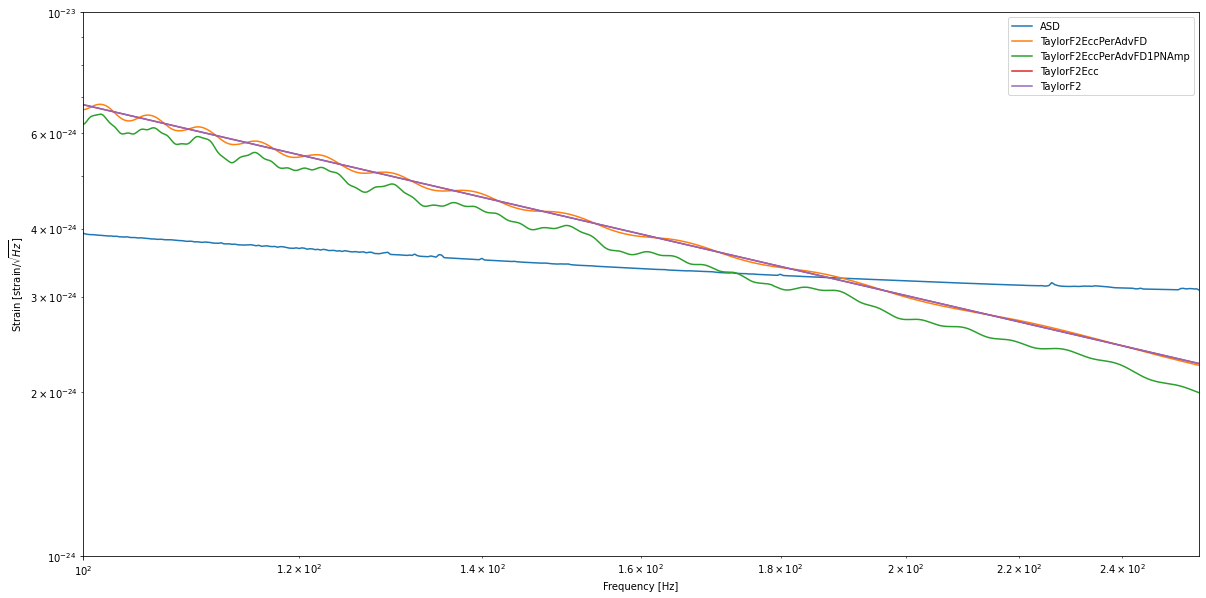

In [14]:
############# TaylorF2EccPerAdvFD waveform model ################
fig, ax = plt.subplots()

'''ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]),
          label="data")'''
ax.loglog(H1.frequency_array[idxs],
          H1.amplitude_spectral_density_array[idxs],
          label="ASD")

ax.loglog(H1.frequency_array[idxs],
          np.abs(H1_injection["plus"][idxs]),
          label="TaylorF2EccPerAdvFD")

############# TaylorF2EccPerAdvFD1PNAmp waveform model ################
ax.loglog(H12.frequency_array[idxs2],
          np.abs(H1_injection2["plus"][idxs2]),
          label="TaylorF2EccPerAdvFD1PNAmp")

############# TaylorF2Ecc waveform model ################
ax.loglog(H13.frequency_array[idxs3],
          np.abs(H1_injection3["plus"][idxs3]),
          label="TaylorF2Ecc")

############# TaylorF2 waveform model ################
ax.loglog(H14.frequency_array[idxs4],
          np.abs(H1_injection4["plus"][idxs4]),
          label="TaylorF2")

#############################
ax.set_xlim(100.,256.)
ax.set_ylim(1e-24,1e-23)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
plt.rcParams['figure.figsize'] = [20, 10]
ax.legend()
plt.show()

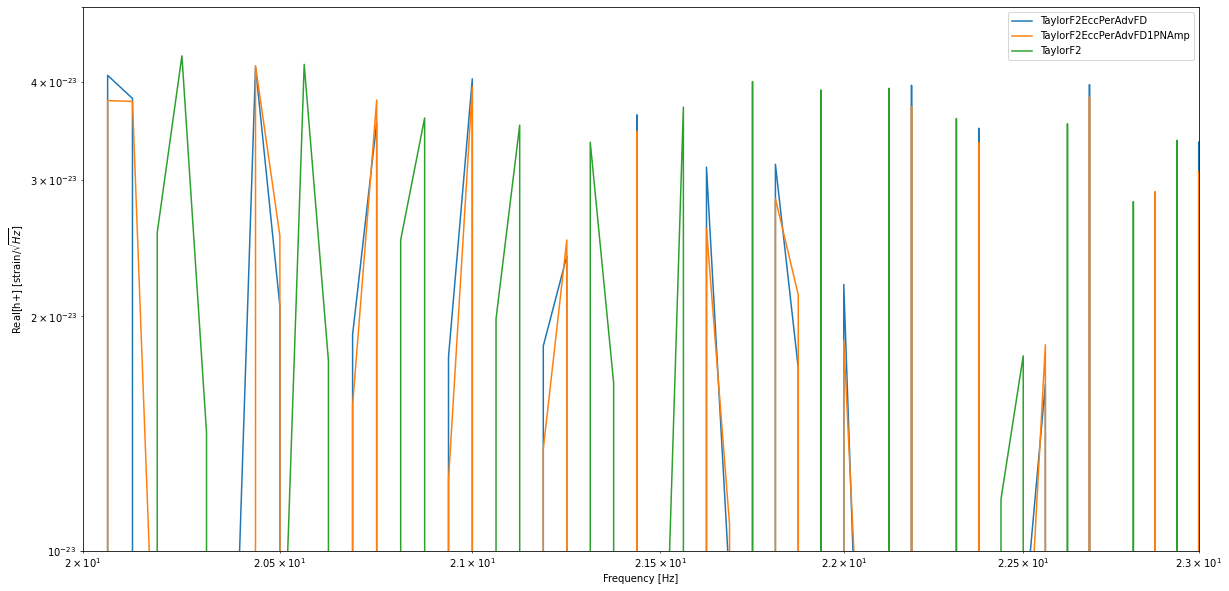

In [15]:
############# my waveform model ################
fig, ax = plt.subplots()

ax.loglog(H1.frequency_array[idxs],
          np.real(H1_injection["plus"][idxs]),
          label="TaylorF2EccPerAdvFD")

############# TaylorF2EccPerAdvFD1PNAmp waveform model ################
ax.loglog(H12.frequency_array[idxs2],
          np.real(H1_injection2["plus"][idxs2]),
          label="TaylorF2EccPerAdvFD1PNAmp")

############# TaylorF2Ecc waveform model ################
'''ax.loglog(H13.frequency_array[idxs3],
          np.real(H1_injection3["plus"][idxs3]),
          label="TaylorF2Ecc")'''

############# TaylorF2 waveform model ################
ax.loglog(H14.frequency_array[idxs4],
          np.real(H1_injection4["plus"][idxs4]),
          label="TaylorF2")

#############################
ax.set_xlim(20.,23.)
ax.set_ylim(1e-23,5e-23)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Real[h+] [strain/$\sqrt{Hz}$]")
ax.legend()
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

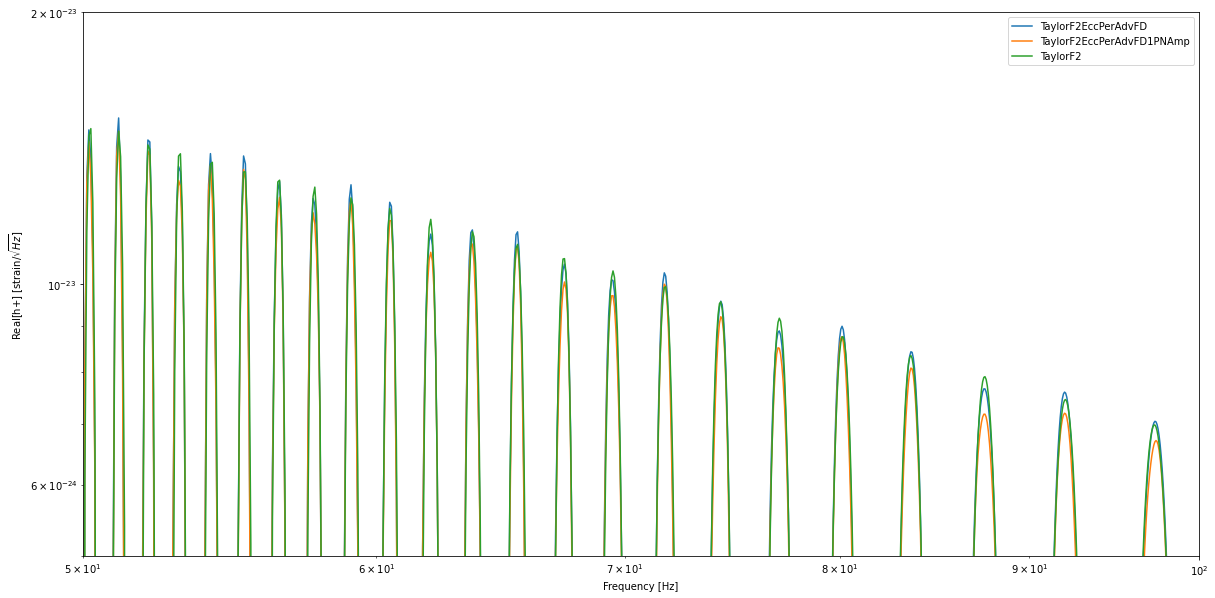

In [16]:
############# my waveform model ################
fig, ax = plt.subplots()

ax.loglog(H1.frequency_array[idxs],
          np.real(H1_injection["plus"][idxs]),
          label="TaylorF2EccPerAdvFD")

############# TaylorF2EccPerAdvFD1PNAmp waveform model ################
ax.loglog(H12.frequency_array[idxs2],
          np.real(H1_injection2["plus"][idxs2]),
          label="TaylorF2EccPerAdvFD1PNAmp")

############# TaylorF2Ecc waveform model ################
'''ax.loglog(H13.frequency_array[idxs3],
          np.real(H1_injection3["plus"][idxs3]),
          label="TaylorF2Ecc")'''

############# TaylorF2 waveform model ################
ax.loglog(H14.frequency_array[idxs4],
          np.real(H1_injection4["plus"][idxs4]),
          label="TaylorF2")

#############################
ax.set_xlim(50.,100.)
ax.set_ylim(0.5e-23,2e-23)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Real[h+] [strain/$\sqrt{Hz}$]")
ax.legend()
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

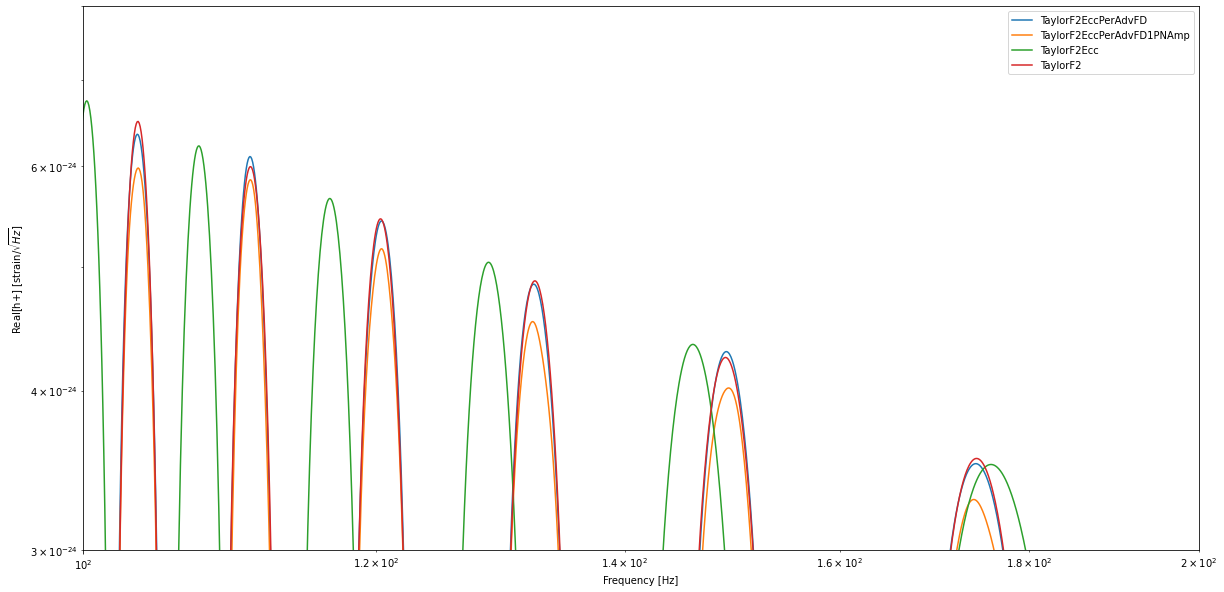

In [17]:
############# my waveform model ################
fig, ax = plt.subplots()

ax.loglog(H1.frequency_array[idxs],
          np.real(H1_injection["plus"][idxs]),
          label="TaylorF2EccPerAdvFD")

############# TaylorF2EccPerAdvFD1PNAmp waveform model ################
ax.loglog(H12.frequency_array[idxs2],
          np.real(H1_injection2["plus"][idxs2]),
          label="TaylorF2EccPerAdvFD1PNAmp")

############# TaylorF2Ecc waveform model ################
ax.loglog(H13.frequency_array[idxs3],
          np.real(H1_injection3["plus"][idxs3]),
          label="TaylorF2Ecc")

############# TaylorF2 waveform model ################
ax.loglog(H14.frequency_array[idxs4],
          np.real(H1_injection4["plus"][idxs4]),
          label="TaylorF2")

#############################
ax.set_xlim(100.,200.)
ax.set_ylim(3e-24,8e-24)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Real[h+] [strain/$\sqrt{Hz}$]")
ax.legend()
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()